# State of the Union Text Generator - Part 1 - Training

Train 'state of the union' text :-) 

## Step - Configuration

In [1]:

DATA_FILES_CLINTON = ['data/1993-Clinton.txt', 'data/1994-Clinton.txt', 'data/1995-Clinton.txt', 'data/1996-Clinton.txt',
                      'data/1997-Clinton.txt', 'data/1998-Clinton.txt', 'data/1999-Clinton.txt']

DATA_FILE_GWBUSH = ['data/2001-GWBush-1.txt', 'data/2001-GWBush-2.txt', 'data/2002-GWBush.txt', 'data/2003-GWBush.txt', 'data/2004-GWBush.txt',
                    'data/2005-GWBush.txt', 'data/2006-GWBush.txt', 'data/2007-GWBush.txt', 'data/2008-GWBush.txt']

DATA_FILES_OBAMA = ['data/2009-Obama.txt', 'data/2010-Obama.txt', 'data/2011-Obama.txt', 'data/2012-Obama.txt', 
              'data/2013-Obama.txt', 'data/2014-Obama.txt', 'data/2015-Obama.txt', 'data/2016-Obama.txt']

DATA_FILES_TRUMP = ['data/2017-Trump.txt', 'data/2018-Trump.txt', 'data/2019-Trump.txt', 'data/2020-Trump.txt']

## for clinton
# APP_NAME = 'sotu-clinton'
# DATA_FILES = DATA_FILES_CLINTON

# ## gw bush
# APP_NAME = 'sotu-gwbush'
# DATA_FILES = DATA_FILES_GWBUSH

# ## for obama
APP_NAME = 'sotu-obama'
DATA_FILES = DATA_FILES_OBAMA

# # ## trump
# APP_NAME = 'sotu-trump'
# DATA_FILES = DATA_FILES_TRUMP

## for 2000+
# APP_NAME = 'sotu-last4'
# DATA_FILES = DATA_FILES_CLINTON + DATA_FILE_GWBUSH + DATA_FILES_OBAMA + DATA_FILES_TRUMP

In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow import keras
print ('tensorflow version :', tf.__version__)
tf.config.experimental.list_physical_devices()

tensorflow version : 2.3.0


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## TF-GPU Debug
The following block tests if TF is running on GPU.

In [3]:
## This block is to tweak TF running on GPU
## You may comment this out, if you are not using GPU

## ---- start Memory setting ----
## Ask TF not to allocate all GPU memory at once.. allocate as needed
## Without this the execution will fail with "failed to initialize algorithm" error

from tensorflow.compat.v1.keras.backend import set_session
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
set_session(sess)
## ---- end Memory setting ----

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5



## Step - Read the Text Corups

In [4]:
import os, pathlib

corpus = []

#for f in os.listdir(DATA_DIR):
    #file_name = os.path.join(DATA_DIR, f)

for file_name in DATA_FILES:
    with open(file_name, 'r') as file:
        file_contents = file.readlines()
        print ('file : ', file_name, ', num lines : ', len(file_contents))
        
        for line in file_contents:
            corpus.append(line)  

print ('corpus total num lines : ', len(corpus))

file :  data/2009-Obama.txt , num lines :  586
file :  data/2010-Obama.txt , num lines :  686
file :  data/2011-Obama.txt , num lines :  680
file :  data/2012-Obama.txt , num lines :  677
file :  data/2013-Obama.txt , num lines :  661
file :  data/2014-Obama.txt , num lines :  259
file :  data/2015-Obama.txt , num lines :  678
file :  data/2016-Obama.txt , num lines :  561
corpus total num lines :  4788


## Step - Text Cleanup

- lower case all text
- remove punctuations
- We are not removing stop words, as it may impact the meaning of text

In [5]:
from nltk.tokenize import RegexpTokenizer

corpus_clean = []

# this will tokenize full words, seperate from punctuations
regex_tokenizer = RegexpTokenizer(r'\w+')

word_count_corpus = 0
word_count_corpus_clean = 0
for sentence in corpus:
    #print (sentence)
    
    ## step 1 : lowercase
    sentence = sentence.lower()
    
    ##  Step 2 : break into words
    words = regex_tokenizer.tokenize (sentence)
    word_count_corpus += len(words)
    
    ## Step 3 : remove punctuations, numbers ..etc
    words_clean =[word for word in words if word.isalpha()]
    word_count_corpus_clean += len(words_clean)
    
    #print ("words:" , words)
       
    if len(words_clean) > 0:
        sentence_clean = " ".join(words_clean)
        #print (sentence_clean)
        #print ("====")
        corpus_clean.append(sentence_clean)
    
print ('word_count_corpus :', word_count_corpus)
print ('word_count_corpus_clean :', word_count_corpus_clean)
print ('removed words : ', (word_count_corpus - word_count_corpus_clean))

word_count_corpus : 54209
word_count_corpus_clean : 53895
removed words :  314


## Step - Tokenize

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(corpus_clean)

### Print out some basic info

In [7]:
## Basic info
from  collections import Counter
from pprint import pprint

def sample_from_dict(d, sample=10):
    import random
    
    keys = random.sample(list(d), sample)
    values = [d[k] for k in keys]
    return dict(zip(keys, values))

print ('total num words :', len(tokenizer.word_index)+1)
print ('\nSome random word mappings : ')
pprint (sample_from_dict(tokenizer.word_index))


counter = Counter(tokenizer.word_counts)
print ('\nTop-N words:')
pprint(counter.most_common(20))

total num words : 4957

Some random word mappings : 
{'broke': 1716,
 'coast': 2025,
 'customs': 4627,
 'dirtier': 4792,
 'dozen': 4055,
 'drapes': 2828,
 'energetx': 3636,
 'harassed': 4682,
 'maintaining': 2287,
 'unsafe': 3586}

Top-N words:
[('the', 2349),
 ('and', 1831),
 ('to', 1792),
 ('of', 1295),
 ('we', 1193),
 ('that', 1172),
 ('a', 1064),
 ('our', 901),
 ('in', 847),
 ('s', 627),
 ('i', 559),
 ('for', 537),
 ('it', 501),
 ('is', 475),
 ('this', 433),
 ('will', 413),
 ('on', 361),
 ('have', 356),
 ('are', 333),
 ('with', 316)]


## Step - Save Tokenizer

In [8]:
import json 

tokenizer_json = tokenizer.to_json()

with open(APP_NAME + '.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

## Create Input Sequences

Here we are creating ngram sequence like this:

```text
line:  mr. speaker, mr. vice president, members of congress, my fellow

   token_list:  [505, 533, 505, 534, 206, 506, 4, 77, 84, 423]
     1: n_gram_sequence: [505, 533]
     1: input_sequences: [[505, 533]]

     2: n_gram_sequence: [505, 533, 505]
     2: input_sequences: [[505, 533], [505, 533, 505]]

     3: n_gram_sequence: [505, 533, 505, 534]
     3: input_sequences: [[505, 533], [505, 533, 505], [505, 533, 505, 534]]

     4: n_gram_sequence: [505, 533, 505, 534, 206]
     4: input_sequences: [[505, 533], [505, 533, 505], [505, 533, 505, 534], [505, 533, 505, 534, 206]]
```

In [9]:

## for debug, uncomment this and test it on smaller corpus
# corpus_clean = corpus_clean[:10]

input_sequences = []

for line in corpus_clean:
    #print ('line: ', line)
    token_list = tokenizer.texts_to_sequences([line])[0]
    #print ('   token_list: ', token_list)
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        #print ('     {}: n_gram_sequence: {}'.format(i, n_gram_sequence))
        input_sequences.append(n_gram_sequence)
        #print ('     {}: input_sequences: {}'.format(i,input_sequences ))
        #print()

total_words = len(tokenizer.word_index) + 1
print ('total_words : ', total_words)

total_words :  4957


In [10]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
print ('max_sequence_len: ', max_sequence_len)

input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
# print ('\ninput_sequences:')
# print(input_sequences)

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
# print ('\nxs:')
# print (xs)
# print ('\nlabels')
# print (labels)

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)
# print ('\nys')
# print (ys)

print ('xs.shape :', xs.shape)
print ('ys.shape :', ys.shape)

max_sequence_len:  132
xs.shape : (49905, 131)
ys.shape : (49905, 4957)


## Setup Tensorboard

In [11]:
## Step - TensorBoard
## This is fairly boiler plate code

import datetime
import os
import shutil

app_name = APP_NAME
# timestamp  = datetime.datetime.now().strftime("%Y-%m-%d--%H-%M-%S")
tb_top_level_dir= '/tmp/tensorboard-logs'
tb_app_dir = os.path.join (tb_top_level_dir, app_name)
tb_logs_dir = os.path.join (tb_app_dir, datetime.datetime.now().strftime("%H-%M-%S"))

print ("Saving TB logs to : " , tb_logs_dir)
#clear out old logs
shutil.rmtree ( tb_app_dir, ignore_errors=True )

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_logs_dir, write_graph=True, 
                                                      write_images=True, histogram_freq=1)

## This will embed Tensorboard right here in jupyter!
# %load_ext tensorboard
#%tensorboard --logdir $tb_logs_dir

Saving TB logs to :  /tmp/tensorboard-logs/sotu-obama/20-39-54


## Step - Build Model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 131, 100)          495700    
_________________________________________________________________
bidirectional (Bidirectional (None, 131, 256)          234496    
_________________________________________________________________
dropout (Dropout)            (None, 131, 256)          0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense (Dense)                (None, 4957)              1273949   
Total params: 2,398,385
Trainable params: 2,398,385
Non-trainable params: 0
_________________________________________________________________


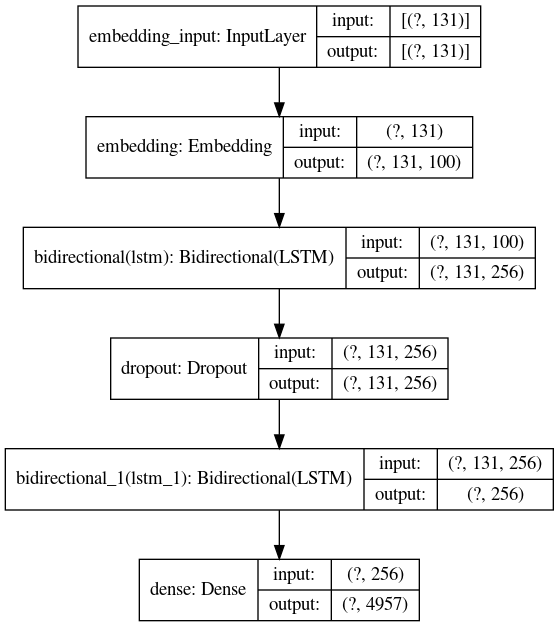

In [12]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


## Basic model 1
model = Sequential([
            Embedding(input_dim=total_words, output_dim=100, input_length=max_sequence_len-1),
            Bidirectional(LSTM(64)),
            Dense(total_words, activation='softmax')
    ])

## Model 2
# model = Sequential([
#             Embedding(input_dim=total_words, output_dim=100, input_length=max_sequence_len-1),
#             Bidirectional(LSTM(64, return_sequences=True)),
#             Bidirectional(LSTM(64)),
#             Dense(total_words, activation='softmax')
#     ])

## Model 3
# model = Sequential([
#             Embedding(input_dim=total_words, output_dim=100, input_length=max_sequence_len-1),
#             Bidirectional(LSTM(64, return_sequences=True)),
#             Dropout(0.2),
#             Bidirectional(LSTM(64)),
#             Dense(total_words, activation='softmax')
#     ])


# opt = 'adam'
# opt = Adam(lr=0.01)

model.compile(loss='categorical_crossentropy', 
              optimizer = 'adam',
              metrics=['accuracy'])
    
model.summary()

tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

## Step - Train

In [13]:
%%time 

cb_early_stop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0.01, patience=10, verbose=2)

checkpoint_path = "model-checkpoint/model.ckpt"
cb_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

## without validation
# history = model.fit(xs, ys, epochs=500, 
#                     verbose=1, callbacks=[tensorboard_callback])


## train with validation
history = model.fit(xs, ys, validation_split=0.2, epochs=500, 
                    verbose=1, callbacks=[tensorboard_callback, cb_early_stop])

Epoch 1/500
   1/1248 [..............................] - ETA: 0s - loss: 8.5086 - accuracy: 0.0000e+00WARNING:tensorflow:From /home/sujee/anaconda3/envs/tf-gpu/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1248/1248 [==============================] - 44s 35ms/step - loss: 6.4985 - accuracy: 0.0511 - val_loss: 6.3350 - val_accuracy: 0.0625
Epoch 2/500
1248/1248 [==============================] - 44s 35ms/step - loss: 6.0089 - accuracy: 0.0731 - val_loss: 6.2061 - val_accuracy: 0.0939
Epoch 3/500
1248/1248 [==============================] - 43s 35ms/step - loss: 5.7014 - accuracy: 0.1012 - val_loss: 6.1465 - val_accuracy: 0.1104
Epoch 4/500
1248/1248 [==============================] - 44s 35ms/step - loss: 5.4602 - accuracy: 0.1155 - val_loss: 6.1481 - val_accuracy: 0.1168
Epoch 5/500
1248/1248

## Step - Visualize Training

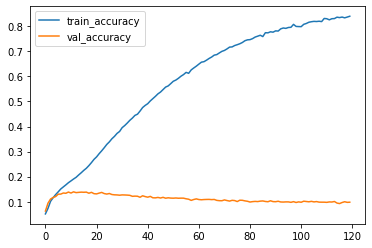

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

## Step - Save the model for reuse later
As you can see training takes a long time.  
Let's save the resulting model, so we can use it quickly without going through training again.

In [15]:
import os

model_file = APP_NAME + '-model.h5'
model.save(model_file)

model_size_in_bytes = os.path.getsize(model_file)
print ("model saved as '{}',  size = {:,} bytes / {:,.1f} KB  / {:,.1f} MB".format(model_file, 
                                    model_size_in_bytes, model_size_in_bytes / 1024, 
                                    model_size_in_bytes / (1024*1024) ))

model saved as 'sotu-obama-model.h5',  size = 28,855,252 bytes / 28,179.0 KB  / 27.5 MB


## Cleanup 
Before running the next exercise, run the following cell to terminate processes and free up resources

In [16]:
## Kill any child processes (like tensorboard)

import psutil
import os, signal

current_process = psutil.Process()
children = current_process.children(recursive=True)
for child in children:
    print('Killing Child pid  {}'.format(child.pid))
    os.kill(child.pid, signal.SIGKILL)
    
## This will kill actual kernel itself
# os.kill(os.getpid(), signal.SIGKILL)